# Homework 1: Applied Machine Learning Assignment

This assignment covers contents of the first three lectures.

We will be focusing on topics related to
1. Data Visualization and Analysis
2. Supervised Learning - Linear Regression, Logistic Regression, and SVM with Data Preprocessing.

### **Due Date is October 3, 11:59 PM.** 

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [208]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [209]:
pd.options.mode.chained_assignment = None

# Task 1: Data Visualization and Analysis

"Now that's A LOT of data. Can you show me something I can understand?"

This question often arises when we see datasets with thousands of rows and want to understand the characteristics of data. 

Data visualization comes to our rescue!

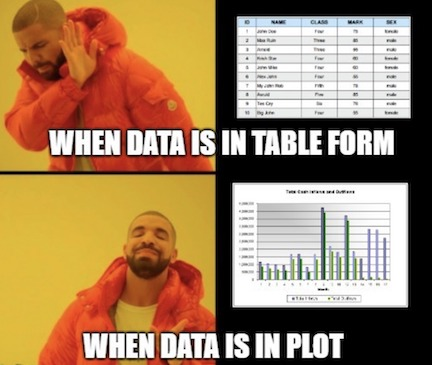


### We are going to use the credit-dataset for Task 1. 

**1.1 Plot the distribution of the features - credit_amount, age, and duration using a histogram.
Make sure to label your axes while plotting. [6 points]**



duration                int64
credit_amount         float64
savings_status         object
employment             object
property_magnitude     object
age                     int64
own_telephone          object
class                  object
dtype: object


/Users/baiwanlina/Downloads/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/baiwanlina/Downloads/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


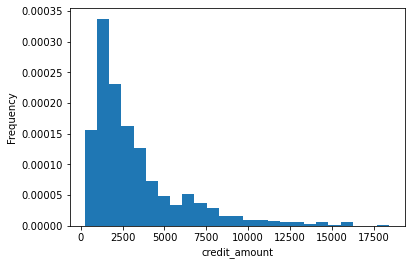

In [70]:
# YOUR CODE HERE
credit = pd.read_csv('/Users/baiwanlina/Desktop/COMS 4995/HW1/Assignment 1 data/dataset_credit.csv') #df
credit.head()
print(credit.dtypes)

plt.hist(credit["credit_amount"], density=True, bins=25)
plt.xlabel('credit_amount')
plt.ylabel('Frequency');

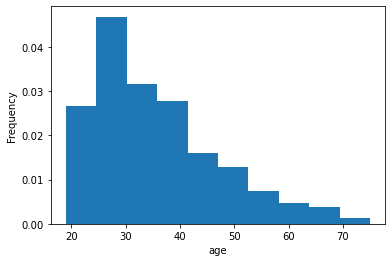

In [83]:
plt.hist(credit["age"], density=True, bins=10)
plt.xlabel('age')
plt.ylabel('Frequency');

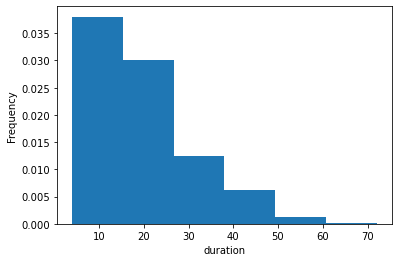

In [81]:
plt.hist(credit["duration"], density=True, bins=6)
plt.xlabel('duration')
plt.ylabel('Frequency');

**1.2 Plot the relationships between the features - class and credit_amount using box plots. Make sure to label the axes[4 points]**



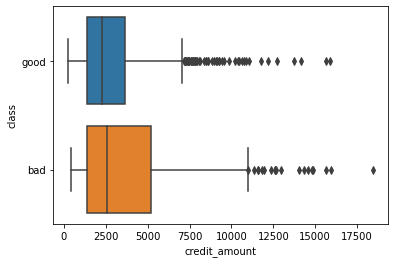

In [69]:
# Your code here
sns.boxplot(data=credit, x="credit_amount", y="class");

**1.3 Plot the distribution of label 'class' using a pie chart. Be sure to label correctly. What do you infer about the data and its distribution from all the plots? (1.1, 1.2, and 1.3)[5 points]**

In [63]:
# Your code here
#If you wanted to add frequency back to the original dataframe use transform to return an aligned index
class_dist = pd.DataFrame(credit["class"].value_counts())
class_dist

,class
good,700
bad,300


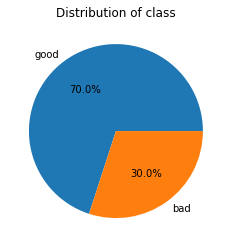

In [68]:
class_dist = pd.DataFrame(credit["class"].value_counts())
plt.pie(x=class_dist["class"], labels=['good','bad'], autopct="%.1f%%");
# autopct to label the wedges with their numeric value
plt.title("Distribution of class");

From 1.1, the distribution of credit_amount is right-skewed and unimodality. The most frequent value of credit_amount is between 1000 and 2500, consists of about half of the data. There are few values of credit_amount>12500.
The distribution age is right-skewed and unimodality. The most frequent age is between 25 and 30, consists of about half of the data. For age over 35, the frequence decreases as age increases.
The distribution duration is right-skewed and unimodality. The most frequent duration is between 0 and 15, consists of about one third of the data. The frequence decreases as duration increases.  

From 1.2, we observe the two class: good and bad, have similar median credit_amount, around 2500. The credit_amount distributions of two classes are similar for credit_amount<2500. The bad class has a larger proportion with credit_amount>2500.

From 1.3, the class has two categories: good and bad. Good consists of 70% and bad consists of 30%. So, most of values in class is good. 

# Task 2 : Linear Models for Regression and Classification

In this notebook, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

## Part 1: Linear Regression

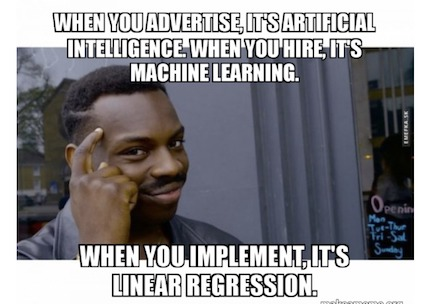

In part 1, we will use two datasets - synthetic and auto-mpg to train and evaluate our linear regression model.

The first dataset will be a synthetic dataset sampled from the following equations:

$ 𝜖 ∼ Normal(0,3) $

$ y = 5𝑥 + 10 + 𝜖 $

In [84]:
np.random.seed(0)
epsilon = np.random.normal(0, 3, 100)
x = np.linspace(0, 10, 100) 
# y = np.linspace(0, 5, 100)
y = 5 * x + 10 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the 𝜖's, and thus the $y$'s, have constant variance.
*   Normality: the 𝜖's are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.1 Plot y vs x in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?[2 points]**

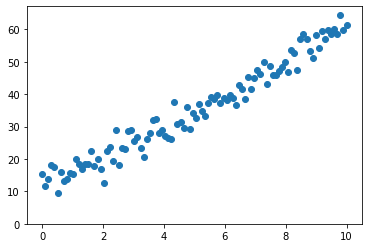

In [102]:
# Your code here
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'o');
ax.set_ylim(ymin=0);

The second dataset we will be using is an [auto MPG dataset](https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset contains various characteristics for around 400 cars. We will use linear regression to predict the mpg label from seven features (4 continuous, 3 discrete).

In [104]:
# load locally
auto_mpg_df = pd.read_csv('/Users/baiwanlina/Desktop/COMS 4995/HW1/Assignment 1 data/auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
# Load auto MPG dataset
auto_mpg_df = pd.read_csv('auto-mpg.csv')

# drop some rows with missing entries
auto_mpg_df = auto_mpg_df[auto_mpg_df['horsepower'] != '?']

# Cast horsepower column to float
auto_mpg_df['horsepower'] = auto_mpg_df['horsepower'].astype(float)

auto_mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [105]:
# Split data into features and labels
auto_mpg_X = auto_mpg_df.drop(columns=['mpg'])
auto_mpg_y = auto_mpg_df['mpg']

**2.1.2 Plot the relationships between the label (mpg) and the continuous features (displacement, horsepower, weight, acceleration) using a small multiple of scatter plots. Make sure to label the axes.[4 points]**

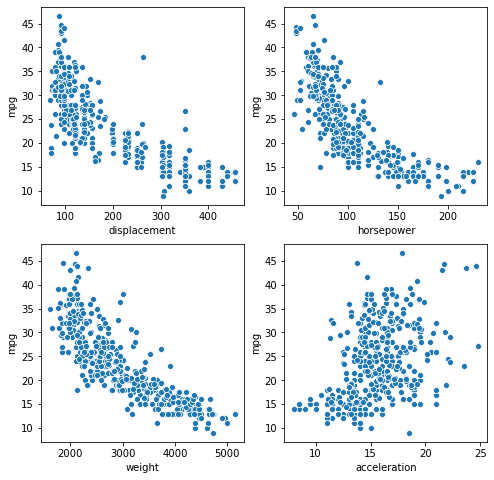

In [108]:
# Your code here
fig,ax=plt.subplots(2,2, figsize=(8,8))
for var,subplot in zip(['displacement', 'horsepower', 'weight', 'acceleration'], ax.flatten()):
    sns.scatterplot(x=var, y=auto_mpg_y, data=auto_mpg_X, ax=subplot)

**2.1.3 Plot the relationships between the label (mpg) and the discrete features (cylinders, model year, origin) using a small multiple of box plots. Make sure to label the axes.[3 points]**

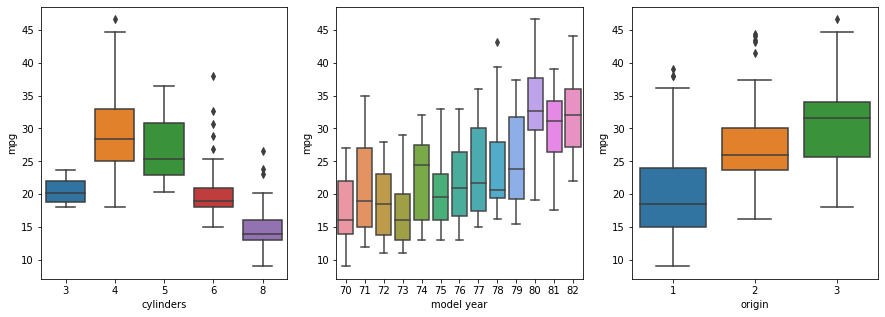

In [112]:
# Your code here
fig,ax=plt.subplots(1,3, figsize=(15,5))
for var,subplot in zip(['cylinders', 'model year', 'origin'], ax.flatten()):
    sns.boxplot(x=var, y=auto_mpg_y, data=auto_mpg_X, ax=subplot)

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.[2 points]**

Linear regression seems to be a good model for this problem. Because our target, mpg, seems to have (affine) linear relationships with most of the variables. From the scatterplot: For the numeric variable, mpg seems to be have linear relationships  with displacement, horsepower, weight. From the boxplot: for categorical data, we can see that after proper encoding, some variables would have (affine) linear realtionship with mpg.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:
1. Encode categorial features appropriately.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
4. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:


In [187]:
X = x.reshape((100, 1))   # Turn the x vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [38.44273829 19.38966655 26.79105322 30.69326568 45.00432104]


**2.1.5 Apply the same processing steps on the auto MPG dataset.[3 points]**

In [123]:
# Your code here
# 1. Encode categorial features
# not necessary because the labels are all numeric

# 2. Split the dataset into training (60%), validation (20%), and test (20%) sets
auto_mpg_X_dev, auto_mpg_X_test, auto_mpg_y_dev, auto_mpg_y_test = train_test_split(auto_mpg_X, auto_mpg_y, test_size=0.2, random_state=0)
auto_mpg_X_train, auto_mpg_X_val, auto_mpg_y_train, auto_mpg_y_val = train_test_split(auto_mpg_X_dev, auto_mpg_y_dev, test_size=0.25, random_state=0)

# 3. Standardize the columns in the feature matrices
scaler = StandardScaler()
auto_mpg_X_train = scaler.fit_transform(auto_mpg_X_train)   # Fit and transform scalar on X_train
auto_mpg_X_val = scaler.transform(auto_mpg_X_val)           # Transform X_val
auto_mpg_X_test = scaler.transform(auto_mpg_X_test)         # Transform X_test

# 4. Add a column of ones to the feature matrices
auto_mpg_X_train = np.hstack([np.ones((auto_mpg_X_train.shape[0], 1)), auto_mpg_X_train])
auto_mpg_X_val = np.hstack([np.ones((auto_mpg_X_val.shape[0], 1)), auto_mpg_X_val])
auto_mpg_X_test = np.hstack([np.ones((auto_mpg_X_test.shape[0], 1)), auto_mpg_X_test])

print(auto_mpg_X_train[:5], '\n\n', auto_mpg_y_train[:5])

[[ 1.          0.65558139  0.39492947  0.1100916   0.8241919   0.28262047
  -0.57603817 -0.77559006]
 [ 1.         -0.88618791 -0.97348359 -0.87531843 -1.20346504 -0.54674887
  -0.02809942  0.43433043]
 [ 1.          1.42646604  1.33761402  1.37704734  1.02260224 -1.159761
  -0.85000755 -0.77559006]
 [ 1.         -0.88618791 -0.5173459  -0.48115442 -0.53443504 -0.00585582
   1.34174745 -0.77559006]
 [ 1.         -0.88618791 -0.97348359 -1.49471902 -1.0244118   2.15771638
   1.06777808  0.43433043]] 

 135    18.0
197    29.0
89     15.0
338    27.2
325    44.3
Name: mpg, dtype: float64


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Auto MPG dataset: auto_mpg_X_train, auto_mpg_X_val, auto_mpg_X_test, auto_mpg_y_train, auto_mpg_y_val, auto_mpg_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.6 Implement a `LinearRegression` class with two methods: `train` and `predict`.[8 points]**
You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.

In [189]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        self.w = np.dot( np.dot(inv(np.dot(X.T, X)+self.alpha), X.T), y)
               
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        y_pred = np.dot(X, self.w)
        return y_pred

### Train,  Evaluate, and Interpret Linear Regression Model

**2.1.7 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.[3 points]**

In [254]:
# Your code here
model = LinearRegression()
model.train(X_train, y_train)
y_pred = model.predict(X_test) # y_pred: array
print("the first and last 3 predictions on X_test: \n", y_pred[[0,1,2,-3,-2,-1]])
print("the first and last 3 actual labels on y_test: \n", y_test[[0,1,2,-3,-2,-1]]) # y_test:series

the first and last 3 predictions on X_test: 
 [23.29684501 53.01355017 11.41016295 22.30628817 26.76379395 14.38183346]
the first and last 3 actual labels on y_test: 
 [23.26858868 56.97068215 13.94631496 28.93047599 20.72427726 13.73074749]


**2.1.8 Plot a scatter plot of y_test vs X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.[2 points]** If your line goes through the data points, you have likely implemented the linear regression correctly!

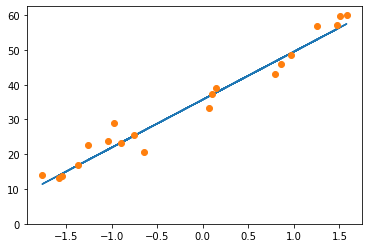

In [199]:
# Your code here
plt.plot(X_test[:,-1],y_pred)
plt.plot(X_test[:,-1],y_test, 'o');
plt.ylim(ymin=0);

**2.1.9 Train a linear regression model ($\alpha = 0$) on the auto MPG training data. Make predictions and report the mean-squared error (MSE) on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.[4 points]**

In [217]:
# Your code here
model = LinearRegression()
model.train(auto_mpg_X_train, auto_mpg_y_train)

auto_mpg_y_pred_train = model.predict(auto_mpg_X_train)
auto_mpg_train_mse = mean_squared_error(auto_mpg_y_train,auto_mpg_y_pred_train)
print('mean-squared error (MSE) on the training data:', auto_mpg_train_mse)

auto_mpg_y_pred_val = model.predict(auto_mpg_X_val)
auto_mpg_val_mse = mean_squared_error(auto_mpg_y_val,auto_mpg_y_pred_val)
print('mean-squared error (MSE) on the validation data:', auto_mpg_val_mse)

auto_mpg_y_pred_test = model.predict(auto_mpg_X_test)
auto_mpg_test_mse = mean_squared_error(auto_mpg_y_test,auto_mpg_y_pred_test)
print('mean-squared error (MSE) on the test data:', auto_mpg_val_mse)
print("the first and last 3 predictions on auto_mpg_X_test: \n", auto_mpg_y_pred_test[[0,1,2,-3,-2,-1]])
print("the first and last 3 actual labels on auto_mpg_y_test: \n", auto_mpg_y_test.values[[0,1,2,-3,-2,-1]])

mean-squared error (MSE) on the training data: 10.376399474320445
mean-squared error (MSE) on the validation data: 12.514802888668513
mean-squared error (MSE) on the test data: 12.514802888668513
the first and last 3 predictions on auto_mpg_X_test: 
 [26.26633376 26.16489231 10.3822785  26.74519755 21.30061937 32.1252929 ]
the first and last 3 actual labels on auto_mpg_y_test: 
 [28.  22.3 12.  26.  19.2 31.5]


**2.1.10 As a baseline model, use the mean of the training labels (auto_mpg_y_train) as the prediction for all instances. Report the mean-squared error (MSE) on the training, validation, and test sets using this baseline. [3 points]** This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression MSEs should be much lower than these baseline MSEs.

In [230]:
# Your code here
train_mse_mean = np.square(np.subtract(auto_mpg_y_train,np.mean(auto_mpg_y_pred_train))).mean()
print('mean-squared error (MSE) on the training data:', train_mse_mean)

val_mse_mean = np.square(np.subtract(auto_mpg_y_val,np.mean(auto_mpg_y_pred_train))).mean()
print('mean-squared error (MSE) on the validation data:', val_mse_mean)

test_mse_mean = np.square(np.subtract(auto_mpg_y_test,np.mean(auto_mpg_y_pred_train))).mean()
print('mean-squared error (MSE) on the test data:', test_mse_mean)

mean-squared error (MSE) on the training data: 60.56461465410187
mean-squared error (MSE) on the validation data: 60.47988929483253
mean-squared error (MSE) on the test data: 62.46160518794081


**2.1.11 Interpret your model trained on the auto MPG dataset using a bar chart of the model weights. [3 points]** Make sure to label the bars (x-axis) and don't forget the bias term!

In [247]:
auto_mpg_features = list(auto_mpg_X.columns)
auto_mpg_features.insert(0,'bias')
#auto_mpg_features

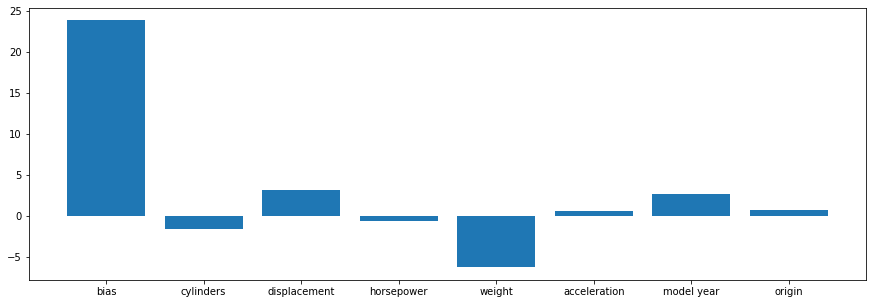

In [246]:
# Your code here
model.train(auto_mpg_X_train, auto_mpg_y_train)
model.w
fig,ax=plt.subplots(1,1, figsize=(15,5))
ax.bar(auto_mpg_features, model.w);

The model has a high bias. For all the input variables, cylinders, displacement, weight, and model year seem to affect mpg. While horsepower, acceleration, and origin seem to has little affect on mpg. Among the effective variables, cylinders, displacement, and model year have positve linear relations with mpg. Weight has negative linear relation with mpg.

**2.1.12 According to your model, which features are the greatest contributors to the MPG?[2 points]**

"weight" is the greatest contributors to the MPG. Because its coefficient in the model has the largerest absolute value in all input variables. 

### Tune Regularization Parameter $\alpha$

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the auto MPG dataset.

**2.1.13 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20. Perform a grid search over these $\alpha$ values, recording the training and validation MSEs for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation MSEs as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation MSE curves. Use a log scale for the x-axis.[4 points]**

In [279]:
# Your code here
gs_train_mse =[]
gs_val_mse =[]

for i in np.logspace(-5, 1, 20):
    modelgs = LinearRegression(alpha=i)
    modelgs.train(auto_mpg_X_train, auto_mpg_y_train)
    
    y_train_pred_gs = modelgs.predict(auto_mpg_X_train)
    gs_train_mse.append(mean_squared_error(auto_mpg_y_train,y_train_pred_gs))
    
    y_val_pred_gs = modelgs.predict(auto_mpg_X_val)
    gs_val_mse.append(mean_squared_error(auto_mpg_y_val,y_val_pred_gs))
    

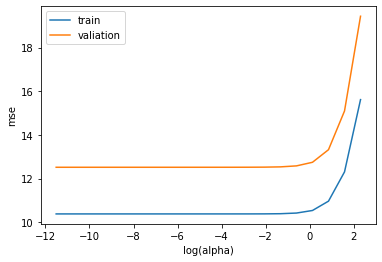

In [281]:
plt.plot(np.log(np.logspace(-5, 1, 20)), gs_train_mse, label='train')
plt.plot(np.log(np.logspace(-5, 1, 20)), gs_val_mse, label='valiation')
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("mse");

**2.1.14 Explain your plot above. How do training and validation MSE behave with decreasing model complexity (increasing $\alpha$)?[ 2 points]**

The validation mse is always higher than the training mse. This makes sense because the model is trained on training data, so the model fits the training data better.

when log(alpha)<0, training and validation MSE are stable, independent of model complexity. when log(alpha)>0, training and validation MSE increase as model complexity decreases. So, the model requires certain complexity to fit the data well. 

## Part 2: Logistic Regression

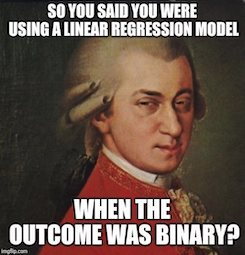






**In this part we would use Logistic Regression on NBA rookie stats to predict if player will last 5 years in league**

Class variable represent:
y = 0 if career years played < 5
y = 1 if career years played >= 5


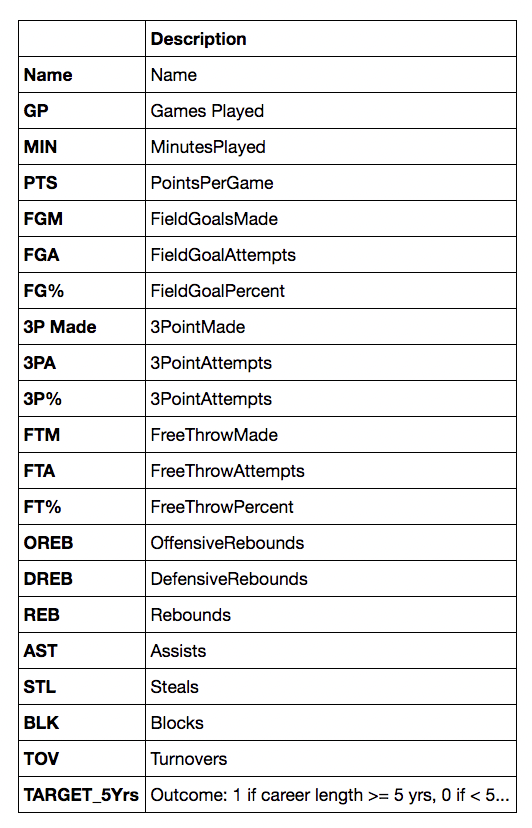

In [284]:
# load locally
nba_reg = pd.read_csv('/Users/baiwanlina/Desktop/COMS 4995/HW1/Assignment 1 data/nba_logreg.csv')
nba_reg.head()
nba_reg.shape

(1340, 21)

In [283]:
nba_reg = pd.read_csv("nba_logreg.csv")
nba_reg.head()
nba_reg.shape

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-283-cfebf969c2cc>, line 4)

#### Missing Value analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)
(Note: Name your dataset as nba_reg_new after removing NAs) [2 points]**

In [285]:
nba_reg.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [286]:
# Your code here 
# Check if there are missing values in the dataset
nba_reg.isnull().sum().sum()

11

There are 11 missing values. This is a small proportion of the data. So, we can remove the missing values.

In [289]:
# Your Code here
nba_reg_new = nba_reg.dropna()
#nba_reg_new # 1329 rows × 21 columns

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.[3 points]**

In [291]:
# Your code here
print(nba_reg['TARGET_5Yrs'].value_counts())

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64


The labels is balanced. category 1 has 831 rows and category 2 has 509 rows. the probability of two categories is close. No category dominates the other.

In [293]:
nba_X = nba_reg_new.drop(columns=['TARGET_5Yrs'])
nba_y = nba_reg_new['TARGET_5Yrs']
print(nba_X.shape)

(1329, 20)


**2.2.3 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?[4 points]**

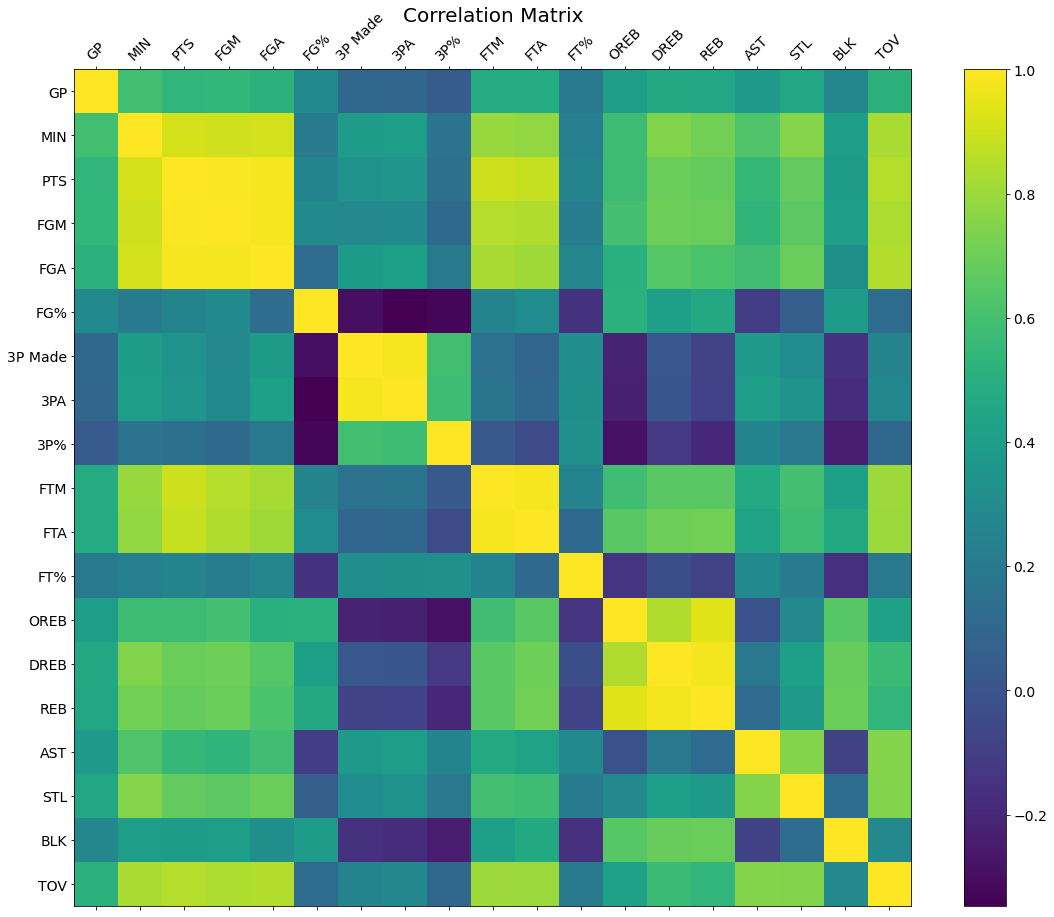

In [296]:
# Your code here
f = plt.figure(figsize=(19, 15))
plt.matshow(nba_X.corr(), fignum=f.number)
plt.xticks(range(nba_X.select_dtypes(['number']).shape[1]), nba_X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(nba_X.select_dtypes(['number']).shape[1]), nba_X.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix',fontsize=20);

In [305]:
cor_matrix = nba_X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print('columns', to_drop, 'are highly correlated')

nba_lowcorr = nba_X.drop(nba_X[to_drop], axis=1)
#nba_lowcorr #1329 rows × 14 columns

columns ['PTS', 'FGM', 'FGA', '3PA', 'FTA', 'REB'] are highly correlated


**Separating Features & Y variable from the processed dataset**

**Please note to replace the dataframe below with the new dataframe created after removing highly correlated features**

In [307]:
# Split data into features and labels

#nba_new_X = nba_lowcorr.drop(columns=['TARGET_5Yrs', 'Name'])
nba_new_X = nba_lowcorr.drop(columns=['Name'])
nba_new_Y = nba_reg_new['TARGET_5Yrs']
print(nba_new_X.columns)

Index(['GP', 'MIN', 'FG%', '3P Made', '3P%', 'FTM', 'FT%', 'OREB', 'DREB',
       'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')


**2.2.4 Apply the following pre-processing steps:[5 points]**

1) Use OrdinalEncoding to encode the label in the dataset

2) Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.

3)Split the dataset into training (60%), validation (20%), and test (20%) sets.

4) Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.

5) Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [315]:
# Your code here
# 1, 2.
nba_new_Y = np.array(nba_new_Y).reshape(-1,1) # nba_new_Y=array([[0.],...,[1.]])

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
nba_new_X_dev, nba_new_X_test, nba_new_Y_dev, nba_new_Y_test = train_test_split(nba_new_X, nba_new_Y, test_size=0.2, random_state=0)
nba_new_X_train, nba_new_X_val, nba_new_Y_train, nba_new_Y_val = train_test_split(nba_new_X_dev, nba_new_Y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
nba_new_X_train = scaler.fit_transform(nba_new_X_train)   # Fit and transform scalar on X_train
nba_new_X_val = scaler.transform(nba_new_X_val)           # Transform X_val
nba_new_X_test = scaler.transform(nba_new_X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
nba_new_X_train = np.hstack([np.ones((nba_new_X_train.shape[0], 1)), nba_new_X_train])
nba_new_X_val = np.hstack([np.ones((nba_new_X_val.shape[0], 1)), nba_new_X_val])
nba_new_X_test = np.hstack([np.ones((nba_new_X_test.shape[0], 1)), nba_new_X_test])

#print(nba_new_X_train[:5], '\n\n', nba_new_Y_train[:5])

### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [316]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
     
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.6 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.[6 points]**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.[2 points] 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)[ 3 points]**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.[1 point]

Clarification: Ignore ‘voice recognition training data’ in Q2.2.6. It should be "nba_logreg" training data. 

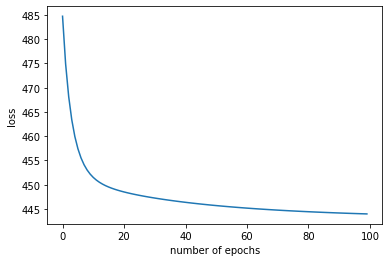

In [337]:
# Your code here 
# Part A
model = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = model.train(X=nba_new_X_train, y=nba_new_Y_train)

loss_new = []
for i in range (0, len(loss)):
    loss_new.append(loss[i][0][0])

loss_new

plt.plot(range(0,100), loss_new)
plt.xlabel("number of epochs")
plt.ylabel("loss");

In [361]:
# Part B and C
alpha_rec = np.random.uniform(0, 1, 20)
eta_rec = np.random.uniform(0, 0.001, 20)
t_rec = np.random.randint(0, 100, 20)

loss_rs = []

for j in range(0,20):
    modelrs = LogisticRegression(alpha=alpha_rec[j], t=t_rec[j], eta=eta_rec[j])
    modelrs.train(X=nba_new_X_train, y=nba_new_Y_train)
    loss_rs.append(modelrs.calculate_loss(nba_new_X_val, nba_new_Y_val)[0][0])
    
best_hyperpara = loss_rs.index(min(loss_rs))
print('best hyperparameters for LogisticRegression: alpha =', alpha_rec[best_hyperpara], 'eta=', eta_rec[best_hyperpara], 't=', t_rec[best_hyperpara])

best hyperparameters for LogisticRegression: alpha = 0.12105987960108544 eta= 0.0005553612630261748 t= 90


In [368]:
model.train(X=nba_new_X_train, y=nba_new_Y_train)
loss_untuned = model.calculate_loss(nba_new_X_test, nba_new_Y_test)[0][0]

model_tuned = LogisticRegression(alpha=alpha_rec[best_hyperpara], t=t_rec[best_hyperpara], eta=eta_rec[best_hyperpara])
model_tuned.train(X=nba_new_X_train, y=nba_new_Y_train)
loss_tuned = model_tuned.calculate_loss(nba_new_X_test, nba_new_Y_test)[0][0]

print('loss for untuned model =', loss_untuned)
print('loss for tuned model =', loss_tuned)

if loss_untuned>=loss_tuned:
    print('loss for untuned model>loss for tuned model, the tuned model is more accurate')
else:
    print('loss for untuned model<loss for tuned model, the untuned model is more accurate')

loss for untuned model = 146.0407270672469
loss for tuned model = 145.06061783053752
loss for untuned model>loss for tuned model, the tuned model is more accurate


### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term![2 points]**

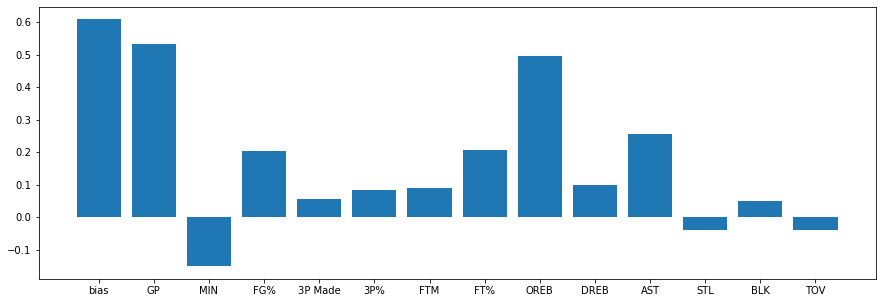

In [381]:
# Your code here
nba_new_features = list(nba_new_X.columns)
nba_new_features.insert(0,'bias')
nba_new_features

model_tuned.w
fig,ax=plt.subplots(1,1, figsize=(15,5))
ax.bar(nba_new_features, model_tuned.w.reshape((1,-1))[0]);

The model has a high bias. The probability that player will last 5 years in league seems to be positively related to GP, FG%, FT%, OREB, and AST; while negatively related to MIN. In this model, other variables have low relevance to if player will last 5 years in league. 
GP seems to be the most influencial varible. 



# **Part 3: Support Vector Machines**

In this part, we will be using a breast cancer dataset for classification. 

Given 30 continuous features describing the nuclei of cells in a digitized image of a fine needle aspirate (FNA) of a breast mass, we will train SVM models to classify each sample as benign (B) or malignant (M).

In [382]:
# load locally
cancer_df = pd.read_csv('/Users/baiwanlina/Desktop/COMS 4995/HW1/Assignment 1 data/breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
cancer_df = pd.read_csv('breast-cancer.csv')
cancer_df = cancer_df.drop(columns=['id', 'Unnamed: 32'])
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [383]:
# Split data into features and labels

cancer_X = cancer_df.drop(columns=['diagnosis'])
cancer_y = cancer_df['diagnosis']

**The following pre-processing steps have been applied to the breast cancer dataset in the next cell:**

1. Encode the categorical label as 0 (B) or 1 (M).
2. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model (certain broadcasting operations may fail unexpectedly).
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from cancer_X_train, and apply it to cancer_X_train, cancer_X_val, and cancer_X_test.
4. Add a column of ones to the feature matrices cancer_X_train, cancer_X_val, and cancer_X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [385]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cancer_df['diagnosis'] = cancer_df.diagnosis.astype("category").cat.codes
cancer_y_enc = cancer_df['diagnosis'].to_numpy()
cancer_y_enc = cancer_y_enc.reshape(cancer_y_enc.shape[0],1)
print(cancer_y_enc.shape)
print(type(cancer_y_enc))


cancer_X_dev, cancer_X_test, cancer_y_dev, cancer_y_test = train_test_split(cancer_X, cancer_y_enc, test_size=0.2, random_state=0)
cancer_X_train, cancer_X_val, cancer_y_train, cancer_y_val = train_test_split(cancer_X_dev, cancer_y_dev, test_size=0.25, random_state=0)


scaler = StandardScaler()
cancer_X_train = scaler.fit_transform(cancer_X_train) 
cancer_X_val = scaler.transform(cancer_X_val)
cancer_X_test = scaler.transform(cancer_X_test)


cancer_X_train = np.hstack([np.ones((cancer_X_train.shape[0], 1)), cancer_X_train])
cancer_X_val = np.hstack([np.ones((cancer_X_val.shape[0], 1)), cancer_X_val])
cancer_X_test = np.hstack([np.ones((cancer_X_test.shape[0], 1)), cancer_X_test])


(569, 1)
<class 'numpy.ndarray'>


### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [420]:
# Your code here
clf = LinearSVC(dual=False)
clf.fit(X=cancer_X_train, y=cancer_y_train)

clf.predict(X=cancer_X_train)
print('accuracy on the training =', clf.score(X=cancer_X_train, y=cancer_y_train))

clf.predict(X=cancer_X_val)
print('accuracy on the validation =', clf.score(X=cancer_X_val, y=cancer_y_val))

clf.predict(X=cancer_X_test)
print('accuracy on the test =', clf.score(X=cancer_X_test, y=cancer_y_test))

accuracy on the training = 0.9912023460410557
accuracy on the validation = 0.9298245614035088
accuracy on the test = 0.9473684210526315


/Users/baiwanlina/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the breast cancer training data. Make predictions and report the accuracy on the training, validation, and test sets.[5 points]**

In [422]:
# Your code here
clf2 = LinearSVC(dual=True)
clf2.fit(X=cancer_X_train, y=cancer_y_train)

clf2.predict(X=cancer_X_train)
print('accuracy on the training =', clf.score(X=cancer_X_train, y=cancer_y_train))

clf2.predict(X=cancer_X_val)
print('accuracy on the validation =', clf.score(X=cancer_X_val, y=cancer_y_val))

clf2.predict(X=cancer_X_test)
print('accuracy on the test =', clf.score(X=cancer_X_test, y=cancer_y_test))

accuracy on the training = 0.9912023460410557
accuracy on the validation = 0.9298245614035088
accuracy on the test = 0.9473684210526315


/Users/baiwanlina/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
